In [ ]:
#Machine Learning Core Libraries
'''
Scikit-learn www.github.com/scikit-learn/scikit-learn -- Supervised and unSupervised learning algorithms
                          
Pylearn2 www.github.com/lisa-lab/pylearn2
                          
NuPIC www.github.com/numenta/nupic
                          
Nilearn www.github.com/nilearn/nilearn
                          
PyBrain www.github.com/pybrain/pybrain
                          
Pattern www.github.com/clips/pattern
                          
Fuel www.github.com/mila-udem/fuel
                          
Bob www.github.com/idiap/bob
                          
Skdata www.github.com/jaberg/skdata
                          
MILK www.github.com/luispedro/milk

                     
https://docs.scipy.org/doc/numpy/reference/
    This is a quick start tutorial for NumPy and covers all the concepts in detail. Online 
                        
http://pandas.pydata.org/pandas-docs/stable/tutorials.html
    This is a guide to many pandas tutorials, geared mainly for new users. Online 
                        
http://matplotlib.org/users/beginner.html  
    Beginners guide, Pyplot tutorial.

'''

In [4]:
# Handling 
import pandas as pd
from patsy import dmatrices
df = pd.DataFrame({'A': ['high', 'medium', 'low'], 'B': [10,20,30]}, index=[0, 1, 2])
print(df)

df_with_dummies= pd.get_dummies(df, prefix='A', columns=['A']) 
print(df_with_dummies)

        A   B
0    high  10
1  medium  20
2     low  30
    B  A_high  A_low  A_medium
0  10       1      0         0
1  20       0      0         1
2  30       0      1         0


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['A_LabelEncoder'] = le.fit_transform(df.A)
print(df)

        A   B  A_LabelEncoder
0    high  10               0
1  medium  20               2
2     low  30               1


In [10]:
#Normalization & Standardization of data
'''
Normalization result in values of between 0 to 1, Whereas
Standardization result in values with ditribution of zero mean and 1 standard deviation - Z-scroe. 
'''
from sklearn import datasets
from sklearn import preprocessing
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
Y = iris.target
standard_scale = preprocessing.StandardScaler().fit(X)
X_standard = standard_scale.transform(X)

minmax_scale = preprocessing.MinMaxScaler().fit(X)
X_minmax = minmax_scale.transform(X)

print('Mean before standardization: petal length={:.1f}, petal width={:.1f}'.format(X[:,0].mean(), X[:,1].mean())) 
print('SD before standardization: petal length={:.1f}, petal width={:.1f}'.format(X[:,0].std(), X[:,1].std())) 
print('Mean after standardization: petal length={:.1f}, petal width={:.1f}'.format(X_standard[:,0].mean(), X_standard[:,1].mean())) 
print('SD after standardization: petal length={:.1f}, petal width={:.1f}'.format(X_standard[:,0].std(), X_standard[:,1].std()))
print(' ')
print('\nMin value before min-max scaling: patel length={:.1f}, patel width={:.1f}'.format(X[:,0].min(), X[:,1].min())) 
print('Max value before min-max scaling: petal length={:.1f}, petal width={:.1f}'.format(X[:,0].max(), X[:,1].max())) 
print('Min value after min-max scaling: patel length={:.1f}, patel width={:.1f}'.format(X_minmax[:,0].min(), X_minmax[:,1].min())) 
print('Max value after min-max scaling: petal length={:.1f}, petal width={:.1f}'.format(X_minmax[:,0].max(), X_minmax[:,1].max()))

Mean before standardization: petal length=3.8, petal width=1.2
SD before standardization: petal length=1.8, petal width=0.8
Mean after standardization: petal length=0.0, petal width=-0.0
SD after standardization: petal length=1.0, petal width=1.0
 

Min value before min-max scaling: patel length=1.0, patel width=0.1
Max value before min-max scaling: petal length=6.9, petal width=2.5
Min value after min-max scaling: patel length=0.0, patel width=0.0
Max value after min-max scaling: petal length=1.0, petal width=1.0


In [11]:
## Exploratory Data Analysis - Univariate & Multivariate Analysis

#Univariate Analysis
import matplotlib.pyplot as plt

iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['species']) 
# replace the values with class labels 
iris.species = np.where(iris.species == 0.0, 'setosa', np.where(iris.species==1.0,'versicolor', 'virginica')) 
# let's remove spaces from column name 
iris.columns = iris.columns.str.replace(' ','')

iris.describe()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
print(iris['species'].value_counts())

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64


<Figure size 1080x576 with 0 Axes>

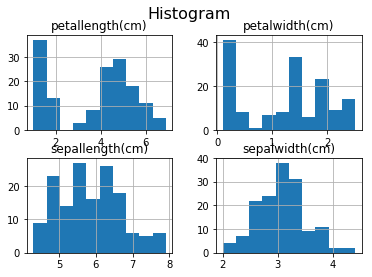

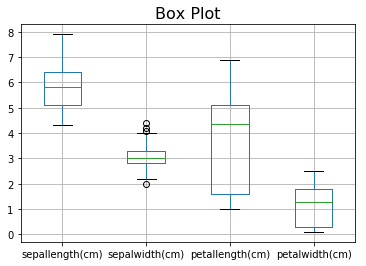

In [22]:
# Set the size of the plot
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 8)) 
iris.hist() # plot histogram 
plt.suptitle("Histogram", fontsize=16) # use suptitle to add title to all sublots 
plt.show() 
iris.boxplot() # plot boxplot 
plt.title("Box Plot", fontsize=16) 
plt.show()